In [121]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

In [122]:
import pandas as pd
df = pd.read_csv("D:/Multimodal Sentiment Analysis/Major Assignment 2/IMDB Dataset.csv")

In [123]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


review       0
sentiment    0
dtype: int64

In [124]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


::# Dataset Analysis

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

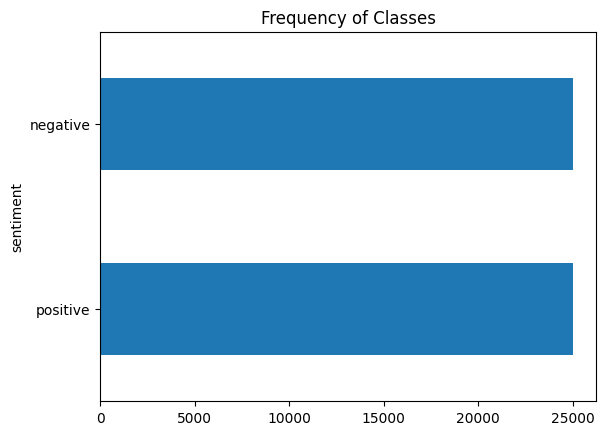

In [126]:
label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per review'}, xlabel='sentiment'>

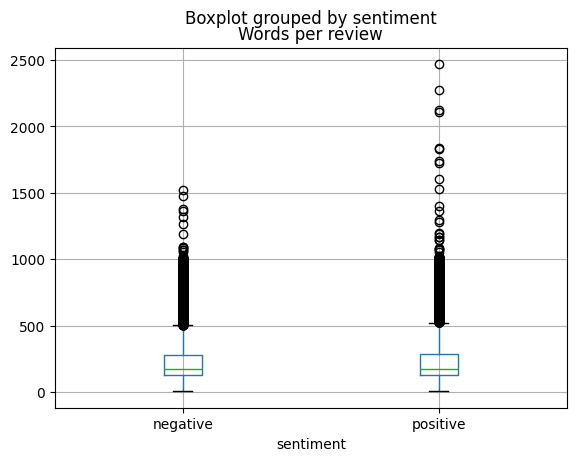

In [127]:
df['Words per review'] = df['review'].str.split().apply(len)
df.boxplot("Words per review", by="sentiment")

#Text to Token Conversion

In [128]:
from transformers import AutoTokenizer

In [129]:
model_ckpt = "distilbert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_ckpt,Truncation = True)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [130]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [131]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 4), (10000, 4), (5000, 4))

In [132]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [133]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'label', 'Words per review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'label', 'Words per review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'label', 'Words per review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [134]:
dataset['train'][0]

{'review': 'If you want to see a true thriller, rent this!!! It\'s not from the director or screenwriter of "Scream", doesn\'t feature overacting, overpaid "TV" actors passing off as "stars", and is not a run of the mill special effects bonanza. Instead you\'ll get a top-notch, edgy, very strong (in violence) yet thrilling nailbiter.',
 'sentiment': 'positive',
 'label': 1,
 'Words per review': 53}

In [135]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 2065, 2017, 2215, 2000, 2156, 1037, 2995, 10874, 1010, 9278, 2023, 999, 999, 999, 2009, 1005, 1055, 2025, 2013, 1996, 2472, 2030, 11167, 1997, 1000, 6978, 1000, 1010, 2987, 1005, 1056, 3444, 2058, 18908, 2075, 1010, 2058, 4502, 3593, 1000, 2694, 1000, 5889, 4458, 2125, 2004, 1000, 3340, 1000, 1010, 1998, 2003, 2025, 1037, 2448, 1997, 1996, 4971, 2569, 3896, 14753, 16076, 1012, 2612, 2017, 1005, 2222, 2131, 1037, 2327, 1011, 18624, 1010, 3968, 6292, 1010, 2200, 2844, 1006, 1999, 4808, 1007, 2664, 26162, 13774, 16313, 2121, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2023, 2003, 2028, 1997, 1996, 2034, 1998, 2190, 8902, 25438, 2891, 

In [136]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [137]:
label2id = {x['sentiment']:x['label'] for x in dataset ['train']}
id2label = {v:k for k,v in label2id.items()}
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

#Model Building

In [138]:
from transformers import AutoModel
import torch

In [139]:
model= AutoModel.from_pretrained(model_ckpt)

In [140]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [141]:
model.config
# model_two="bert-base-cased"

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.0",
  "vocab_size": 30522
}

In [142]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [143]:
device


device(type='cuda')

In [144]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [145]:
from transformers import TrainingArguments

batch_size=16
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              evaluation_strategy="epoch",
              save_strategy="epoch",
              logging_dir='./logs',
              logging_steps=10,
              report_to="none"
    )

c:\Users\Ramith\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [146]:
from huggingface_hub import login
login()

In [147]:
# ! pip install evaluate

other than the above method, you can also use sklearn to calc accuracy

In [148]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [149]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

C:\Users\Ramith\AppData\Local\Temp\ipykernel_23188\3311494627.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [150]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.165900,0.206731,0.923600,0.923563
2,0.097500,0.218259,0.935400,0.935397


TrainOutput(global_step=4376, training_loss=0.19355682605090918, metrics={'train_runtime': 7924.8904, 'train_samples_per_second': 8.833, 'train_steps_per_second': 0.552, 'total_flos': 9272717905920000.0, 'train_loss': 0.19355682605090918, 'epoch': 2.0})

In [151]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.22838157415390015,
 'test_accuracy': 0.9343,
 'test_f1': 0.9342958994070821,
 'test_runtime': 177.4,
 'test_samples_per_second': 56.37,
 'test_steps_per_second': 3.523}

In [152]:
preds_output.predictions

array([[-2.9508543,  2.8504357],
       [-2.848286 ,  2.7261374],
       [ 2.871583 , -3.0211332],
       ...,
       [ 1.3322024, -1.4310446],
       [ 2.8104367, -3.0520914],
       [ 2.9570425, -3.1545062]], dtype=float32)

In [153]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5000
           1       0.93      0.94      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [155]:
label2id

{'positive': 1, 'negative': 0}

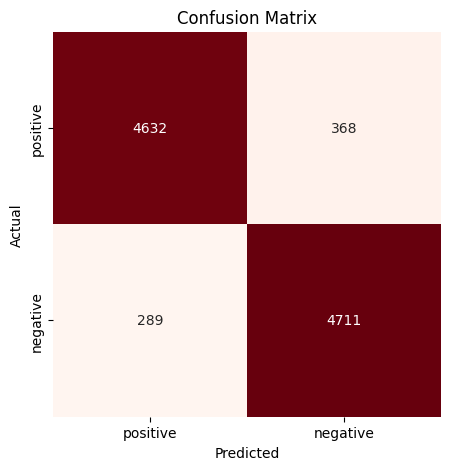

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true, y_pred, and label2id are already defined
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")  # Corrected from plt.yabel to plt.ylabel
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()


#Build Prediction function and save model

In [160]:
text = "Movie is good. It is best of all the films I watched this year."
text2 = "worst movie I ever saw"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text2)

'negative'

In [161]:
trainer.save_model("distilbert-base-uncased-sentiment-model")

In [163]:
# use pipeline for prediciton
from transformers import pipeline
classifier = pipeline('text-classification', model= 'distilbert-base-uncased-sentiment-model')
classifier([text, text2, "Best Cinematography", "Slow Narrative"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.995075523853302},
 {'label': 'negative', 'score': 0.9970846772193909},
 {'label': 'positive', 'score': 0.8143129944801331},
 {'label': 'negative', 'score': 0.935175359249115}]

In [3]:
# make a file app.py, and use this code


# import streamlit as st
# from transformers import pipeline

# st.title("Fine-Tuning BERT for Twitter Sentiment Classification")

# classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')

# text = st.text_area("Enter Your Tweet Here")

# if st.button("Predict"):
#         result = classifier(text)
#         st.write("Prediction Result:", result)

#